In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data=pd.read_csv("/kaggle/input/diamonds/diamonds.csv")
df=data.copy()
df.head()

In [ ]:
df=df.select_dtypes(include=['float64','int64'])
df.head()

In [ ]:
df=df.iloc[:,1:]
df.head()

In [ ]:
df_table=df["table"].copy()

In [ ]:
df.isnull().sum()

In [ ]:
sns.boxplot(x=df_table)

# AYKIRI DEGER

### VECTOR DUZEYINDE AYKIRI DEGER SORGULAMA:

In [ ]:
Q1=df_table.quantile(0.25)
Q3=df_table.quantile(0.75)
IQR=Q3-Q1

alt_sinir=Q1-1.5*IQR
ust_sinir=Q3+1.5*IQR
print(alt_sinir)
print(ust_sinir)

In [ ]:
(df_table<(alt_sinir))|(df_table>(ust_sinir))
#aykiri degerleri true olarak verir tum datadan
#BUNA VEKTOR DUZEYINDE AYKIRI DEGER SORGULAMASI DENIR 

In [ ]:
df_table<alt_sinir

In [ ]:
aykiri_tf=df_table<alt_sinir
aykiri_tf[0:13]

In [ ]:
aykirilar=df_table[aykiri_tf]
aykirilar.index
#Burda aykirilarin kendisi geliyor
#aykiri gozlemlerin indexini yakaladik

### Aykiri Deger probleminin Cozulmesi:

In [ ]:
import pandas as pd
display(df_table.head())
display(type(df_table))
display(df_table.shape)

### 1) Drop outlier:

In [ ]:
#clean_df_table=df_table[~((df_table<(alt_sinir))|(df_table>(ust_sinir))).any(axis=1)]
#temiz_df_table = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis = 1)]

In [ ]:
#temiz_df_table.shape

### 2)we can write mean for outlier:

In [ ]:
df_table=df["table"].copy()

In [ ]:
sns.boxplot(x=df_table)

In [ ]:
df_table[aykiri_tf]

In [ ]:
df_table.mean()

In [ ]:
df_table[aykiri_tf]=df_table.mean()

df_table[aykiri_tf]#tekrar cagirdigimizda ortalamayla dolduruldugunu goruyoruz

In [ ]:
aykiri_tf=(df_table<(alt_sinir))|(df_table>(ust_sinir))

In [ ]:
df_table[aykiri_tf].head()
#aykiri degerleri tek tarafli bakmistik ,bir de 2 tarafli bakalim

In [ ]:
df_table.describe() #onceki describe hali

In [ ]:
df_table[aykiri_tf] = df_table.mean() #tum 2 tarafli olan aykiri degerler ortalama ile dolduruldu.

In [ ]:
df_table.describe() #sonraki describe hali.std ve mean kuculdu

### 3) Aykiri Degerleri Baskilama ile Doldurma

In [ ]:
#bunu silmek istemedigimiz icin yapiyoruz cunku onemli olabilecegini dusunuyoruz.
df_table = df["table"].copy()

aykiri_tf = df_table < (alt_sinir)
df_table[aykiri_tf]

In [ ]:
df_table[aykiri_tf] = alt_sinir 
#aykiri olan degerleri alt sinir degerine esitledik.Bunu ust sinir icin de yapabiliriz ayri
df_table[aykiri_tf]

## COK DEGISKENLI AYKIRI GOZLEM ANALIZI
* Tek degiskende boxplot kullandik burda LOF kullanacagiz.

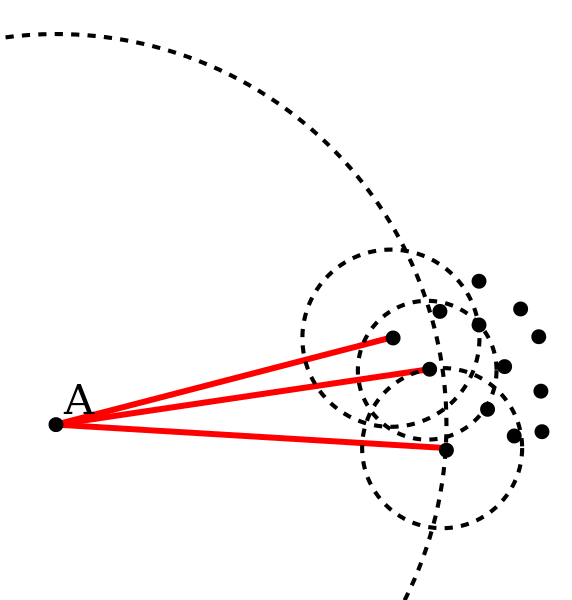

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
#Kendimiz suni sekilde bir yapi olusturuyoruz.Grafikle ele alabilmek icin yaptik.
np.random.seed(42) #olusturulacak sayilarin sabit olmasini sagliyoruz.
X_inliers = np.random.normal(70, 3, (100, 2))#normal bir dagilimdan bunu olusturduk.
#ortalamasi 70,std si 3 olan(varyansi) 2 boyutlu veri seti olusturuyoruz

X_inliers = np.r_[X_inliers + 10, X_inliers - 10] 

print(X_inliers.shape)
print(X_inliers[:3,:2])

In [ ]:
X_outliers = np.random.uniform(low=15, high=130, size=(20, 2))
#en dusuk 15 en yuksek 130 olan 2 degiskenden olusan outlier olusturuyoruz.
X_outliers

In [ ]:
X = np.r_[X_inliers, X_outliers]  #2 suni veriyi birlestiriyoruz.
X[0:3,:]

In [ ]:
#LOF SKORLARININ HESAPLANMASI
LOF = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
LOF.fit_predict(X)
X_score = LOF.negative_outlier_factor_  
#butun gozlemleri bu skorlama islemine tabi tutma islemi
X_score[0:3]

In [ ]:
X_score.mean()

In [ ]:
X_score.std()

In [ ]:
np.sort(X_score)[0:10]

In [ ]:
plt.hist(X_score, bins = "auto", density = True)
plt.show

In [ ]:
#AYKIRI GOZLEMLERIN GORSELLESTIRILMESI
plt.scatter(X[:,0], X[:,1], color = "k", s = 3, label = "Gözlem Birimleri");

In [ ]:
radius = radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())

In [ ]:
plt.scatter(X[:,0], X[:,1], color = "k", s = 3, label = "Gözlem Birimleri");

plt.scatter(X[:, 0], X[:, 1], s = 1000 * radius, edgecolors='r', 
            facecolors='none',label='LOF Skorları') #facecolor halkalarin icini bos birakmak analami

plt.xlim((10,100))
plt.ylim((10,100))

legend = plt.legend(loc = "upper left")

legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [30]  #2 degisken varmis gibi grafik olustu.
#cok degisken oldugunda boyut indirgemesi yapip(2 ye indirip) boyle grafiklendirilebilir

In [ ]:
#AYKIRI GOZLEMLERIN YAKALANMASI
X[0:3]

In [ ]:
np.sort(X_score)[0:9]

In [ ]:
esik_deger = np.sort(X_score)[9]
esik_deger

In [ ]:
(X_score > esik_deger)[200:220]

In [ ]:
tf_vektor = (X_score > esik_deger)

X[X_score < esik_deger]  #aykiri gozlemlerin kendisine ulasmis oluruz.
# > yaparsak aykiri gozlemlerden arinmis seklini gormus oluruz 

In [ ]:
X[~tf_vektor]  #aykiri gozlemlere boyle de erisebiliriz.

In [ ]:
X[X_score < esik_deger]

In [ ]:
X[200:220] #ornegin bunun icinde bazi aykiri degerleri yakalabiliriz,gorebiliriz.
#belki o degisken tek basina aykiri deger degil ama baska degiskenle beraber 
#degerlendirildiginde aykiri gozlem olmus olabilir

## Aykırı Gözlem Problemini Çözmek

### 1 ) Delete outlier

In [ ]:
df = X[X_score > esik_deger]

df[0:10]

### 2 )We can write mean for outlier

In [ ]:
#AYKIRI GOZLEMLERI ORTALAMA ILE DOLDURMA.
df_X = X.copy()
np.mean(df_X[0])

In [ ]:
np.mean(df_X[1])

In [ ]:
df_X[~tf_vektor] #aykiri gozlemlerimiz

In [ ]:
aykirilar = df_X[~tf_vektor]
aykirilar[:,:1]

In [ ]:
aykirilar[:,:1] = np.mean(df_X[0]) #1.degisken icin yaptik

In [ ]:
aykirilar[:,1:2] = np.mean(df_X[1]) #2.degisken icin yaptik
aykirilar #cagirdigimiz da 2 si icin de degistigini gormus oluruz

In [ ]:
df_X[~tf_vektor] = aykirilar #bu islem ile doldurmus olduk
df_X[~tf_vektor]

### 3 ) Aykiri degerleri Baskilama ile degistirme(lof skorlarina gore):

In [ ]:
#AYKIRI DEGERLERI BASKILAMA ILE DEGISTIRMEK(LOF UN VERDIGI SKORLARA GORE)
df_X = X.copy()

df_X[~tf_vektor]

In [ ]:
df_X[X_score == esik_deger]

In [ ]:
df_X[~tf_vektor] = df_X[X_score == esik_deger] #aykiri degerleri esik degere esitlemis olduk
df_X[~tf_vektor]

# NAN VALUES(Eksik Veri - Hızlı Çözüm)

### 1) Drop NaN values

In [ ]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna()
df#degismedi inplace ya da bir degiskene atanabilir

In [ ]:
dff = df.dropna()
dff.isnull().sum()

### 2) we will give mean values for NaN values

In [ ]:
df["V1"].mean()

In [ ]:
df["V1"].fillna(df["V1"].mean())

In [ ]:
df["V1"].fillna(0)

In [ ]:
df.apply(lambda x: x.fillna(x.mean()), axis = 0)

### Eksik veriyi saptamak

In [ ]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.dtypes

In [ ]:
df.notnull().sum()  #nan olmayan deger sayilari tum degiskenlerde

In [ ]:
df.isnull().sum() #nan sayisi tum degiskenlerde

In [ ]:
df.isnull().sum().sum() #tum toplam nan sayisi

In [ ]:
df.isnull() #true fals lu gosterir

In [ ]:
df[df.isnull().any(axis = 1)] #kendisinde en az 1 eksik veri olan gozlem birimlerini getirdi

In [ ]:
df[df.notnull().all(axis = 1)] #tum degerleri tam olan gozlem birimleri

In [ ]:
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()]
#tum degerleri tam olan gozlem birimleri(baska yontem-amele)

### Görselleştirme

In [ ]:
import missingno as msno
msno.bar(df);

In [ ]:
df.isnull().sum()

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar = False);

In [ ]:
msno.matrix(df)

In [ ]:
#koralasyon heatmap
msno.heatmap(df); 
#kendilerinde eksik olanlarin birbirini etkileme durumlari.Mesela ayni anda veriler bos olabilir,birbiri arasinda koralasyon var mi ona bakiyoruz

In [ ]:
null_pattern = (np.random.random(1000).reshape((50, 20)) > 0.5).astype(bool)

null_pattern = pd.DataFrame(null_pattern).replace({False: None})

msno.matrix(null_pattern.set_index(pd.period_range('1/1/2011', '2/1/2015', freq='M')) , freq='BQ');
#missigno kutuphanesi ornegi:x ekseni birimler,y ekseni tarihler.Elimizde zaman serisi varsa bu sekilde yapilabilir

### Silme Yöntemleri

In [ ]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

In [ ]:
df.dropna()

In [ ]:
df.dropna(how = "all") #tum satiri NaN olanlari siler.

In [ ]:
df.dropna(axis = 1) #sutuna bakar en az 1 eksik veri varsa,sutunu siler.

In [ ]:
df["V1"][[3,6]] = 99 #fancy index kullanarak 99 atama yapiyoruz

In [ ]:
df.dropna(axis = 1)  #v1 sutununda NaN veri olmadigi icin kaldi

In [ ]:
df.dropna(axis = 1, how = "all") #ayni anda bir sutunda hepsi  NaN olanlari silmek icin.

In [ ]:
df

In [ ]:
df.dropna(axis = 1, how = "all", inplace = True)

In [ ]:
df

### Basit Değer Atama Yöntemleri

In [ ]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

In [ ]:
df["V1"].fillna(0)  # 0 ile doldurduk 

In [ ]:
df["V1"].fillna(df["V1"].mean())  #v1 sutunindaki NaN degerleri v1 in ortalamasiyla doldurduk

In [ ]:
df.apply(lambda x: x.fillna(x.mean()), axis = 0 ) #tum gozlemleri kendi ortalamalariyla doldurma

In [ ]:
df.fillna(df.mean()[:]) #tum gozlemleri kendi ortalamalariyla doldurma(kisa yolu)

In [ ]:
df.fillna(df.mean()["V1":"V2"]) #ilk iki degiskeni ortalamayla doldurmak istiyoruz
df.fillna(df.median()["V3"]) #Diyelimki dagilim carpik oldugu icin boyle tercih ettik.

In [ ]:
df.where(pd.notna(df), df.mean(), axis = "columns")#pandas in baska bir yolu  ?????

In [ ]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

In [ ]:
df.groupby("departman")["maas"].mean() 
#biz eger maas daki nan degerlere onun ortalamasini atarsak hata yapmis oluruz ,
#kategorik degiskenlerin kirilimina bakmamiz lazim,mesela departman kismi
#siniflarini da gozonunde bulundurup atama yaparsak daha isabet olur.

In [ ]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))
#departman degerinde,kiriliminda degerleri basmis olduk,sonuna implace koyarsak kalici hale gelir

### Kategorik Değişkenlerde Değer Atama¶

In [ ]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT",np.NaN,"IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

In [ ]:
df.isnull() #eksik bilgi yok gozukuyor ama kucuk harflerle nan yazilmis

In [ ]:
df.groupby("departman")["departman"].count() #burada yakalayabiliriz

In [ ]:
df.departman.loc[df.departman == "nan"] = "IK" #IK atadik

In [ ]:
df

In [ ]:
df.departman[0] = df.V3[0]

In [ ]:
df

In [ ]:
df.groupby("departman")["departman"].count()

In [ ]:
df.departman.fillna(df["departman"].mode()) #mode, yani en cok tekrar edeni atamis oldu
#baska bir yontem: kendisinden bir onceki veya sonraki degerlerle de doldurabiliriz.

### ZamanSerilerinde Atama İşlemleri

In [ ]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

In [ ]:
df["maas"].interpolate() #nan degeri kendisinden bir onceki ve bir sonraki degerin ortalamasiyla dolduruyor

In [ ]:
df["maas"].fillna(method = "bfill")#bir sonraki degerle dolduruyor

### Tahmine Dayalı Değer Atama Yöntemleri
* bunun icin piyasada 4  5 kutuphane var.fancyinput,ycinput,pymice....

In [ ]:
import seaborn as sns
df = sns.load_dataset('planets').copy()
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.isnull().sum())
msno.matrix(df);

### Fancyimpute

In [ ]:
!pip install fancyimpute

In [ ]:
from fancyimpute import KNN

In [ ]:
import pandas as pd

In [ ]:
var_names = list(df) #kolon isimleri silinecek ondan sakliyorum isimlerini

### KNN

In [ ]:
knn_imp = KNN(k = 5).fit_transform(df);

In [ ]:
knn_imp[0:1] #array bu

In [ ]:
dff = pd.DataFrame(knn_imp)# dataframe donusturduk

In [ ]:
dff.head()

In [ ]:
dff.columns = var_names#kolonlarini yazdik

In [ ]:
dff.head()

In [ ]:
dff.isnull().sum()

### YCIMPUTE YONTEMI

In [ ]:
#YCIMPUTE YONTEMI
!pip install ycimpute

In [ ]:
from ycimpute.imputer import knnimput

In [ ]:
var_names = list(df)

In [ ]:
n_df = np.array(df) #nanpy array e donusturduk bu programda kullanicidan istiyor cevirmeyi ama baska programlarda kendisi cevirebiliyor

In [ ]:
n_df.shape

In [ ]:
dff = knnimput.KNN(k=4).complete(n_df)

In [ ]:
dff = pd.DataFrame(dff, columns = var_names)

In [ ]:
dff.head()

In [ ]:
dff.isnull().sum()

### Random Forests ile Atama

In [ ]:
import seaborn as sns
df = sns.load_dataset('planets').copy()
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.isnull().sum())
msno.matrix(df);

In [ ]:
from ycimpute.imputer import iterforest

In [ ]:
var_names = list(df)

In [ ]:
n_df = np.array(df)

In [ ]:
dff = iterforest.IterImput().complete(n_df)

### EM ile Atama

In [ ]:
df.head()

In [ ]:
from ycimpute.imputer import EM

In [ ]:
var_names = list(df)

In [ ]:
n_df = np.array(df)

In [ ]:
dff = EM().complete(n_df)

In [ ]:
dff = pd.DataFrame(dff, columns = var_names)

In [ ]:
dff.isnull().sum()

## Veri Standardizasyonu & Değişken Dönüşümü

### Standartlaştırma

In [ ]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)



df = df.astype(float)
df

In [ ]:
from sklearn import preprocessing

In [ ]:
preprocessing.scale(df) #!!! ORTALAMASI 0 VE STANDART SAPMASI 1 OLACAK SEKILDE STANDARTLASTIRILDI

### Normalizasyon
* DEGERLERI 0 ILE 1 ARASINDA DONUSTURMEK.Aslinda bu da standartlastirma islemi olarak kabul edilebilir.

In [ ]:
preprocessing.normalize(df)

### Min-Max Dönüşümü
* ISTEDIGIMIZ ARALIGA DONUSRURMEK ICIN KULLANILIR.VAARYANS YAPISI KORUNUP OLCEKLER DEGISIYOR

In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range = (10,20))

In [ ]:
scaler.fit_transform(df)

### Binarize Dönüşüm
* BELLI BIR ESIK DEGERE GORE DEGISKENLERIN DEGERLERINI 0 1 E DONUSTURUR.
* BU ISLEM DEGISKENIN STANDARTLASTIRILMASI DEGIL,DONUSUMU OLMUS OLUYOR,TASIMIS OLDUGU BILGIYI ETKILEMEKTEDIR********

In [ ]:
binarizer = preprocessing.Binarizer(threshold = 5).fit(df) #esik deger 5 girildi
#fit_transform da olur fit de olur

In [ ]:
binarizer.transform(df)

### 0-1 Dönüşümü
* KATEGORIK DEGISKENI SUREKLI DEGISKENE CEVIRME ISLEMIDIR

In [ ]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df_l = df.copy()

In [ ]:
df_l.head()

In [ ]:
df_l["yeni_sex"] = df_l["sex"].cat.codes #yeni degisken ekleyip 0 ve 1 lerden olusturuyor

### "1 ve Diğerleri (0) " Dönüşümü

In [ ]:
df.head()

In [ ]:
df["day"].str.contains("Sun")

In [ ]:
import numpy as np 
df["yeni_day"] = np.where(df["day"].str.contains("Sun"), 1, 0)

In [ ]:
df

### Çok Sınıflı Dönüşüm

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [ ]:
lbe.fit_transform(df["day"])

In [ ]:
#cok dikkat

### One-Hot Dönüşümü ve Dummy Değişken Tuzağı

In [ ]:
df.head()

In [ ]:
df_one_hot = pd.get_dummies(df, columns = ["sex"], prefix = ["sex"])

In [ ]:
df_one_hot.head()

In [ ]:
pd.get_dummies(df, columns = ["day"], prefix = ["day"]).head()